### Reading dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
print(df.describe())

          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2  


In [5]:
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [6]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [7]:
print(df.isnull().sum())
print(df['label'].value_counts())

label      0
message    0
dtype: int64
label
ham     4825
spam     747
Name: count, dtype: int64


### End-to-End Pipeline - Preprocessing Text Data

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [12]:
def preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()
    
    # 2. Remove punctuation and numbers using regex
    # This regex keeps only alphabetic characters and spaces
    text = re.sub(r'[^a-zA-Z\\s]', '', text)
    
    # 3. Tokenization
    tokens = nltk.word_tokenize(text)
    
    # 4. Remove stop words and lemmatize
    processed_tokens = []
    for word in tokens:
        if word not in stop_words and len(word) > 1: # Also remove very short tokens
            lemma = lemmatizer.lemmatize(word)
            processed_tokens.append(lemma)
            
    # Join tokens back into a string
    return ' '.join(processed_tokens)

In [13]:
df['processed_message'] = df['message'].apply(preprocess_text)
print(df[['message', 'processed_message']].head())

                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                   processed_message  
0  gountiljurongpointcrazyavailableonlyinbugisngr...  
1                                 oklarjokingwifuoni  
2  freeentryinawklycomptowinfacupfinaltktsstmayte...  
3                  udunsaysoearlyhorucalreadythensay  
4    nahidontthinkhegoestousfhelivesaroundherethough  


### Transforming Text into Numbers - Vectorization

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [15]:
X = df['processed_message'] # Features
y = df['label']           # Target

# It's good practice to convert labels to numerical format if they aren't already
# For example, 'spam' -> 1, 'ham' -> 0
y = y.map({'ham': 0, 'spam': 1})

In [16]:
count_vectorizer = CountVectorizer(max_features=5000) # Limit to top 5000 features
X_bow = count_vectorizer.fit_transform(X)
print(f"Shape of Bag-of-Words matrix: {X_bow.shape}")

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# Fit the vectorizer to the data and transform the data into a matrix
X_tfidf = tfidf_vectorizer.fit_transform(X)
print(f"Shape of TF-IDF matrix: {X_tfidf.shape}")

Shape of Bag-of-Words matrix: (5572, 5000)
Shape of TF-IDF matrix: (5572, 5000)


### Training the Spam Detector with Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred[:20])   # starting 20 shows as 'ham'

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Evaluating the Spam Detector's Performance

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate a detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Confusion Matrix:
[[965   0]
 [145   5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       1.00      0.03      0.06       150

    accuracy                           0.87      1115
   macro avg       0.93      0.52      0.50      1115
weighted avg       0.89      0.87      0.81      1115



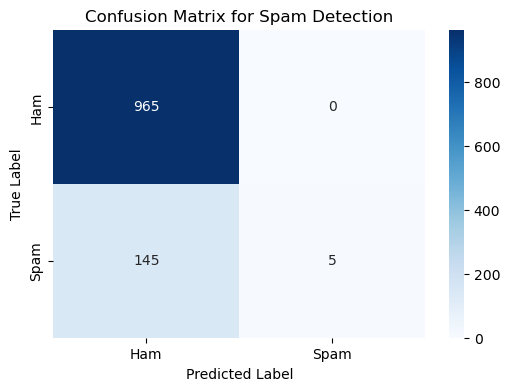

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Spam Detection')
plt.show()

### Identifying Misclassified Emails and Discussing Reasons

In [29]:
results = pd.DataFrame({'message': df['message'], 
                        'processed_message': df['processed_message'],
                        'true_label': df['label']})
y_pred_full = model.predict(X_bow)
results['predicted_label'] = y_pred_full

In [30]:
# Identify misclassified emails
misclassified_emails = results[results['true_label'] != results['predicted_label']]
print(f"Misclassified emails: {len(misclassified_emails)}")

# Display some misclassified emails
print("Examples of Misclassified Emails:")
for index, row in misclassified_emails.head().iterrows():
    print(f"--- Email Index: {index} ---")
    print(f"True Label: {'Spam' if row['true_label'] == 1 else 'Ham'}")
    print(f"Predicted Label: {'Spam' if row['predicted_label'] == 1 else 'Ham'}")
    print(f"Original Message: {row['message'][:200]}...") # Display first 200 chars
    print(f"Processed Message: {row['processed_message'][:200]}...")

Misclassified emails: 5572
Examples of Misclassified Emails:
--- Email Index: 0 ---
True Label: Ham
Predicted Label: Ham
Original Message: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat......
Processed Message: gountiljurongpointcrazyavailableonlyinbugisngreatworldlaebuffetcinetheregotamorewat...
--- Email Index: 1 ---
True Label: Ham
Predicted Label: Ham
Original Message: Ok lar... Joking wif u oni......
Processed Message: oklarjokingwifuoni...
--- Email Index: 2 ---
True Label: Ham
Predicted Label: Ham
Original Message: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's...
Processed Message: freeentryinawklycomptowinfacupfinaltktsstmaytextfatotoreceiveentryquestionstdtxtratetcsapplyovers...
--- Email Index: 3 ---
True Label: Ham
Predicted Label: Ham
Original Message: U dun say so early hor... U c already then say......
